# Questão 3 - aproximações por diferenças finitas. 

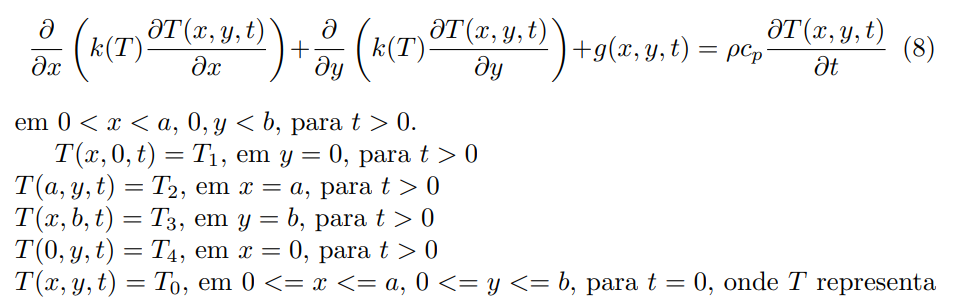

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Parâmetros físicos [definidos por mim]
Lx = 1.0  # comprimento da placa em x
Ly = 1.0  # comprimento da placa em y
T1 = 100.0  # Temperatura em y = 0
T2 = 50.0  # Temperatura em x = a
T3 = 75.0  # Temperatura em y = b
T4 = 25.0  # Temperatura em x = 0
T0 = 0.0  # Temperatura inicial
k0 = 0.02  # Condutividade térmica inicial
rho = 1.0  # Massa específica
cp = 1.0  # Calor específico
alpha = k0 / (rho * cp)  # Difusividade térmica
gx = 0.0  # Termo fonte em x
gy = 0.0  # Termo fonte em y
T = 100   #Time (se definir muito grande acaba demorando pra rodar)


nx = 50  # número de pontos de grade em x
ny = 50  # número de pontos de grade em y
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
dt = 0.01  # passo de tempo


x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

#Temp_init
u = np.ones((nx, ny)) * T0
u[:, 0] = T1
u[:, -1] = T3
u[0, :] = T4
u[-1, :] = T2

#rermo fonte
g = np.zeros((nx, ny))
# g[20:30, 20:30] = 10.0  # Exemplo: adicionando um termo fonte em uma região específica

In [3]:
for t in range(int(T / dt)):
    u_new = u.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            k = k0 * (1 + u[i, j] / 100.0) 
            termo_x = k * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2
            termo_y = k * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy**2
            u_new[i, j] = u[i, j] + alpha * dt * ((termo_x) + termo_y + g[i,j])
    u = u_new


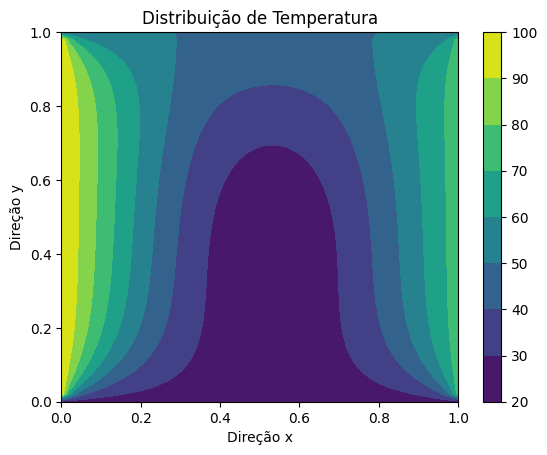

In [4]:
#Plot
plt.contourf(X, Y, u, cmap='viridis')
plt.colorbar()
plt.title('Distribuição de Temperatura')
plt.xlabel('Direção x')
plt.ylabel('Direção y')
plt.show()